### Se genera un nuevo archivo sales_formatted

In [9]:
import pandas
## calendar = pandas.read_csv("calendar.csv")
sales_original = pandas.read_csv("sales_train_validation.csv")
## sell_prices = pandas.read_csv("sell_prices.csv")

## Convertir columnas [d_1,d_1913] a registros de una columna d
## Para esto utilizamos un melt
id_columns = ["item_id", "dept_id", "cat_id", "store_id"]
value_columns = [c for c in sales_original.columns if c.startswith("d_")]

sales_formatted = sales_original.melt(
    id_vars = id_columns,
    value_vars = value_columns,
    var_name = "d",   
    value_name = "sales"
)

## Exportamos sales_formatted a csv
sales_formatted.to_csv("sales_formatted.csv", index=False)
## Execution time: 1m 27s



### Se importan librerias

In [ ]:
## import pandas

## calendar = pandas.read_csv("calendar.csv")
## sales_formatted = pandas.read_csv("sales_formatted.csv")
## sell_prices = pandas.read_csv("sell_prices.csv")

### Se comienza con el analisis

In [ ]:
import pandas as pd
import pyodbc as db

connection = db.connect("DRIVER={ODBC Driver 17 for SQL Server};SERVER=MIGUESGO;DATABASE=M5_Forcasting;Trusted_Connection=yes;")
query = """
    WITH total_sales_from_item AS (
        -- Total sales from every item in all stores
        SELECT store_id,
            item_id,
            SUM(sales) AS total_sales
        FROM dbo.sales_formatted
        GROUP BY store_id, item_id
    ), max_sales_from_store AS (
        -- Max sales from every store
        SELECT store_id,
        MAX(total_sales) as max_sales
        FROM total_sales_from_item
        GROUP BY store_id
    )
    SELECT TS.store_id,
        TS.item_id,
        MS.max_sales
    FROM total_sales_from_item AS TS
    JOIN max_sales_from_store AS MS
        ON TS.store_id = MS.store_id
        AND TS.total_sales = MS.max_sales
    ORDER BY store_id;
"""

dataFrame = pd.read_sql(query, connection)


C:\Users\migue\AppData\Local\Temp\ipykernel_13616\1492611132.py:30: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  dataFrame = pd.read_sql(query, connection)


,store_id,item_id,max_sales
0,CA_1,FOODS_3_090,127203
1,CA_2,FOODS_3_586,63416
2,CA_3,FOODS_3_090,250502
3,CA_4,FOODS_3_090,52264
4,TX_1,FOODS_3_586,112454
5,TX_2,FOODS_3_586,192835
6,TX_3,FOODS_3_586,150122
7,WI_1,FOODS_3_226,78993
8,WI_2,FOODS_3_226,69966
9,WI_3,FOODS_3_090,121434


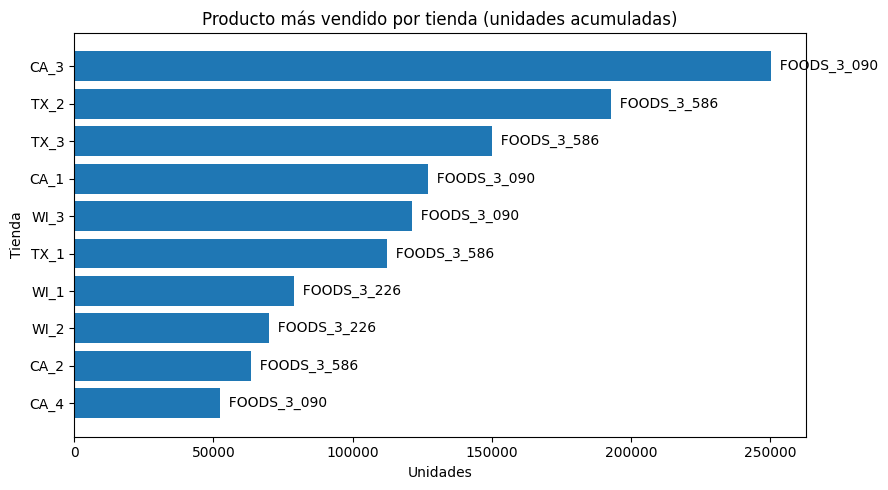

In [2]:
import matplotlib.pyplot as plt

dataFramePlot = dataFrame.sort_values("max_sales", ascending=True)
# Grafico de barras horizontal
fig, ax = plt.subplots(figsize=(9,5))
ax.barh(dataFramePlot["store_id"], dataFramePlot["max_sales"])

# Etiquetas con el item al final de cada barra
for y, (val, item) in enumerate(zip(dataFramePlot["max_sales"], dataFramePlot["item_id"])):
    ax.text(val, y, f"  {item}", va="center")

ax.set_title("Producto más vendido por tienda (unidades acumuladas)")
ax.set_xlabel("Unidades")
ax.set_ylabel("Tienda")
plt.tight_layout()
plt.show()